# Genre recognition: experiment

Goal: Verify the hypothesis that our structuring auto-encoder behaves better in a noisy setting that a sparse auto-encoder.

Conclusion: Hypothesis verified by an accuracy increase of 5% with 10% of added Gaussian noise.

Observations:

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'lg'
Pvalues = [None, 100]

# Regenerate the graph or the features at each iteration.
regen_graph = False
regen_features = True

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'cosine'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 10
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5

### Data parameters

In [3]:
# HDF5 data stores.
p['folder'] = 'data'
p['filename_gtzan'] = 'gtzan.hdf5'
p['filename_audio'] = 'audio.hdf5'
p['filename_graph'] = 'graph.hdf5'
p['filename_features'] = 'features.hdf5'

# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Added white noise.
p['noise_std'] = 0.1

### Numerical parameters

In [4]:
# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-5  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['Nfolds'] = 10
p['Ncv'] = 40
p['dataset_classification'] = 'Z'

## Processing

In [5]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph -------------------- 

Data: (149000, 96), float32
Elapsed time: 614.88 seconds
All self-referenced in the first column: True
dist in [0.0, 0.681089401245]
w in [0.283994346857, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2789250,), float32
  L_indices : (2789250,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2789250,), float32
  W_indices : (2789250,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = cosine
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 625.28 seconds

 -------------------- Features, lg = None -------------------- 

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288,000 x n=96 -> 123,648

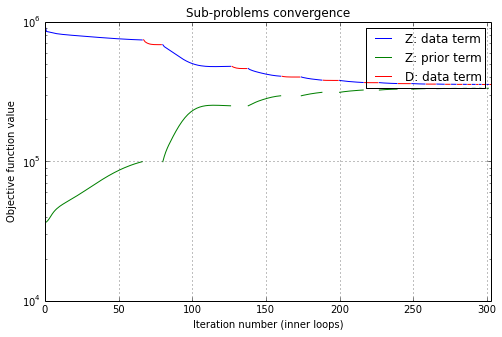

Inner loop: 304 iterations
g(Z) = ||X-DZ||_2^2 = 3.556715e+05
rdiff: 0.000847538508528
i(Z) = ||Z||_1 = 3.337448e+05


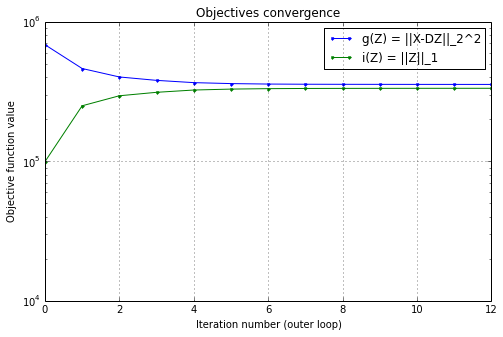

Global objective: 6.894163e+05


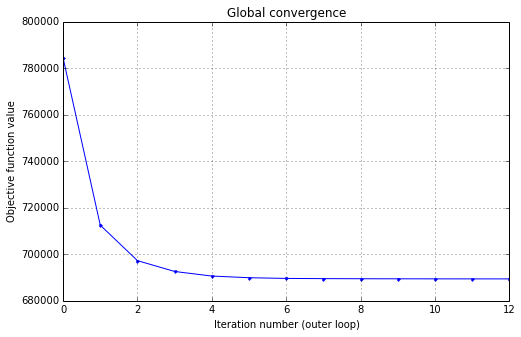

Outer loop: 13 iterations

Z in [-0.925734937191, 0.85433703661]
Sparsity of Z: 5,470,082 non-zero entries out of 19,072,000 entries, i.e. 28.7%.


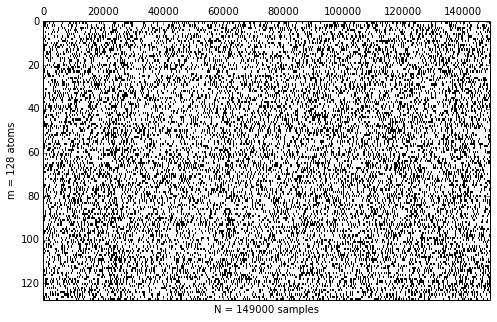

D in [-0.296960860491, 0.514295816422]
d in [0.999999701977, 1.00000035763]
Constraints on D: True


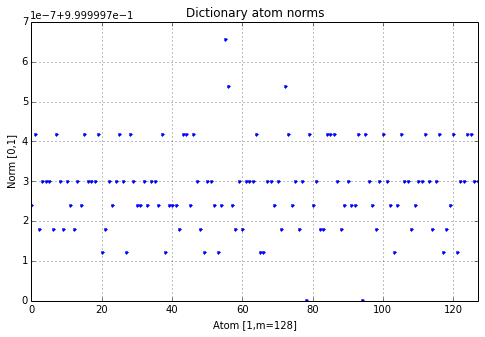

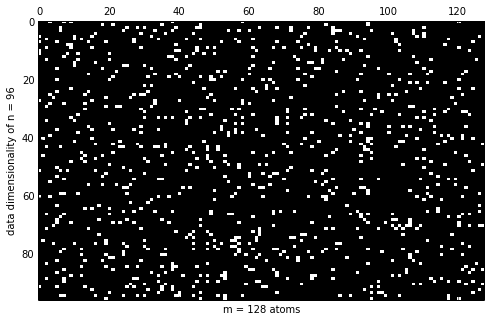

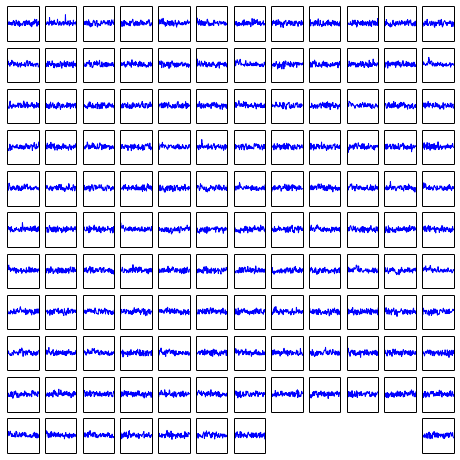

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 396 seconds

 -------------------- Classification, lg = None -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=1

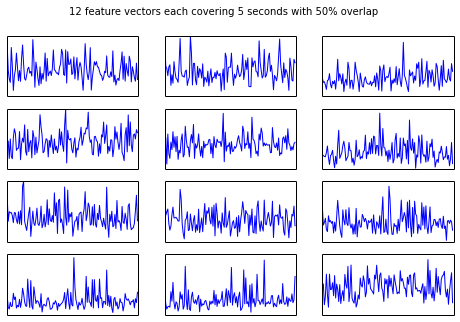

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 54.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 48.4 %
Clips accuracy: 57.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  56 (+/- 7.0) <- [54 68 54 54 54 68 50 46 50 60]
  56 (+/- 4.8) <- [60 57 57 48 57 57 60 60 56 46]
  57 (+/- 5.2) <- [52 60 57 57 48 54 54 60 68 60]
  59 (+/- 4.4) <- [50 62 60 62 62 57 64 54 62 54]
  57 (+/- 8.8) <- [40 60 52 64 44 62 66 57 68 54]
  57 (+/- 5.4) <- [57 56 57 57 62 52 60 54 44 64]
  56 (+/- 6.5) <- [50 57 40 60 57 57 60 50 62 60]
  57 (+/- 5.0) <- [62 56 60 54 66 48 54 52 56 60]
  57 (+/- 6.8) <- [62 54 56 52 70 66 46 52 56 57]
  56 (+/-

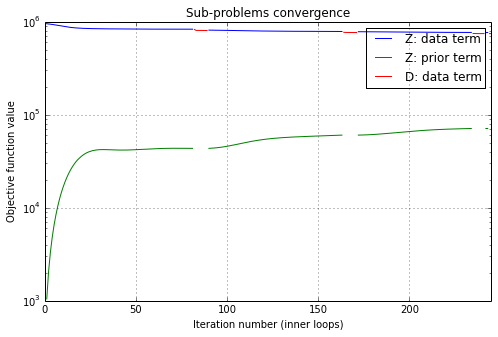

Inner loop: 246 iterations
g(Z) = ||X-DZ||_2^2 = 7.462377e+05
rdiff: 0.000593498029647
i(Z) = ||Z||_1 = 7.127560e+04
j(Z) = tr(Z^TLZ) = 2.056625e+04


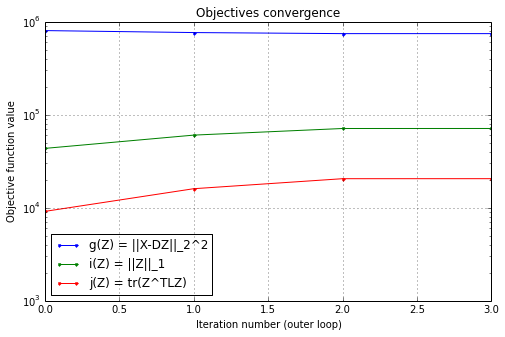

Global objective: 8.380796e+05


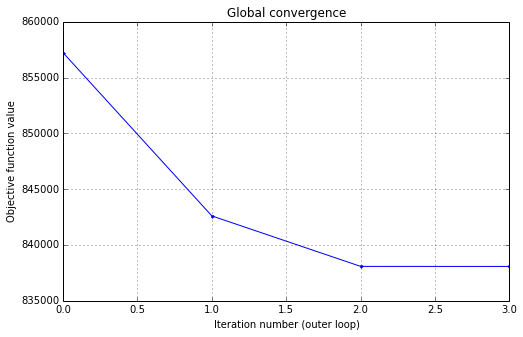

Outer loop: 4 iterations

Z in [-0.056636184454, 0.14264112711]
Sparsity of Z: 8,786,613 non-zero entries out of 19,072,000 entries, i.e. 46.1%.


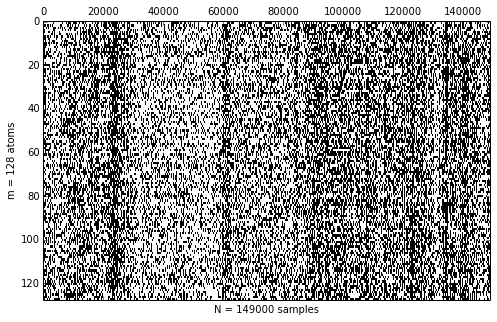

D in [-0.145910441875, 0.507630586624]
d in [0.999999761581, 1.00000023842]
Constraints on D: True


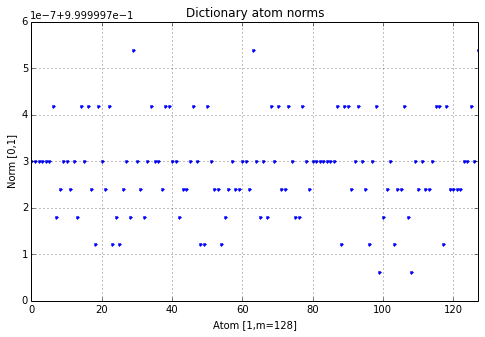

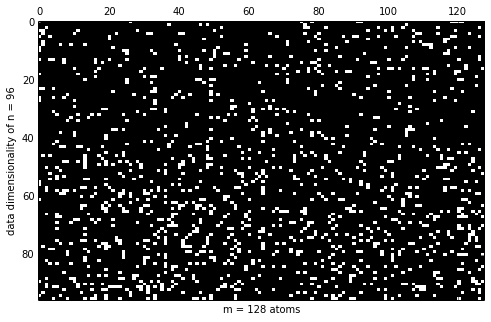

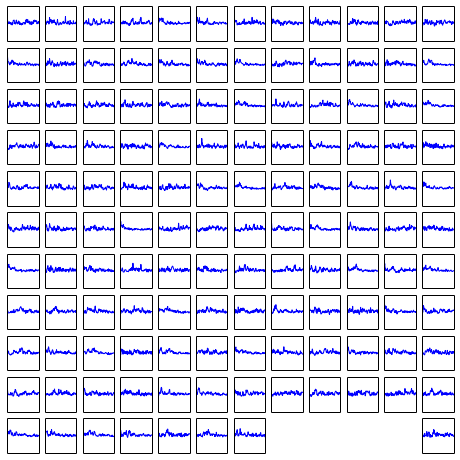

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 660 seconds

 -------------------- Classification, lg = 100 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=12

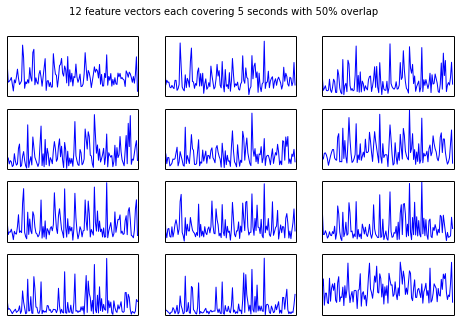

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 63.2 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 57.2 %
Clips accuracy: 62.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  64 (+/- 7.1) <- [68 70 57 62 74 70 60 48 64 64]
  61 (+/- 4.7) <- [62 60 56 57 72 66 64 57 62 56]
  62 (+/- 5.3) <- [60 64 68 62 57 66 56 54 72 60]
  62 (+/- 4.4) <- [54 60 66 68 64 62 64 57 68 57]
  61 (+/- 8.7) <- [52 68 70 64 48 68 68 62 68 46]
  63 (+/- 7.8) <- [66 68 70 56 76 50 68 57 54 64]
  63 (+/- 6.2) <- [50 72 64 64 56 72 62 62 64 64]
  61 (+/- 7.0) <- [60 50 56 68 76 54 64 64 62 60]
  63 (+/- 6.8) <- [72 54 56 60 74 70 62 62 56 68]
  61 (+/-

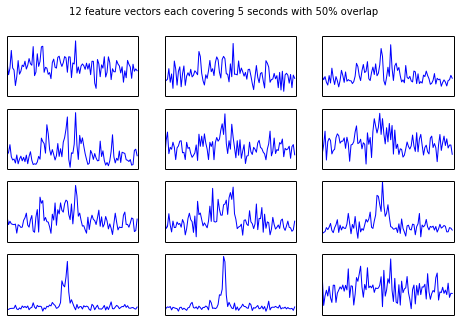

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 59.3 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 54.8 %
Clips accuracy: 62.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1152), float64
Labels: (500,), uint8
  58 (+/- 7.0) <- [64 60 60 42 52 68 64 56 56 56]
  59 (+/- 6.6) <- [64 62 52 46 70 66 60 57 56 60]
  61 (+/- 6.2) <- [60 66 72 54 57 62 56 54 70 56]
  58 (+/- 6.4) <- [50 56 57 68 68 57 64 48 57 56]
  57 (+/- 5.6) <- [48 60 54 60 62 56 68 57 54 50]
  58 (+/- 4.0) <- [54 57 64 60 64 56 60 57 50 57]
  58 (+/- 5.8) <- [54 56 54 62 57 66 60 52 52 70]
  60 (+/- 7.2) <- [57 48 60 64 70 48 68 57 66 57]
  58 (+/- 5.0) <- [66 48 57 57 60 64 52 60 60 56]
  59 (+/- 5

In [6]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        p['filename_features'] = 'features_{}_{}.hdf5'.format(Pname, p[Pname])
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if not regen_graph and not regen_features:
    # Classifier parameters are being tested.
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
else:
    separator('Baseline')
    %run audio_classification.ipynb
res['baseline'] = len(Pvalues) * [accuracy]
res['baseline_std'] = accuracy_std

## Results

lg = [None, 100]
res['accuracy_std'] = [6.6807110400016629, 6.5823703937107663]
res['objective_j'] = [0, 20566.252136230469]
res['objective_i'] = [333744.78125, 71275.6015625]
res['objective_h'] = [0, 0]
res['objective_g'] = [355671.5234375, 746237.734375]
res['baseline'] = [58.574999999999989, 58.574999999999989]
res['time_features'] = [387.99416518211365, 650.4659931659698]
res['baseline_std'] = 6.7423567838
res['sparsity'] = [28.681218540268457, 46.07074769295302]
res['iterations_inner'] = [304, 246]
res['iterations_outer'] = [13, 4]
res['accuracy'] = [56.910000000000018, 61.820000000000022]


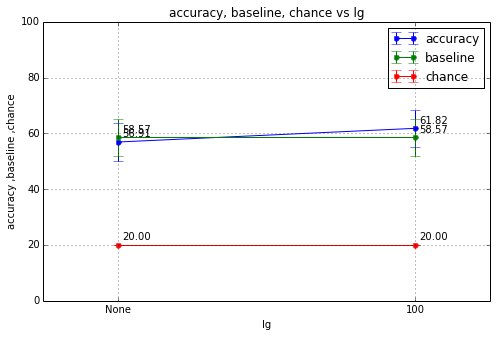

/usr/lib/python2.7/dist-packages/numpy/ma/core.py:3847: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


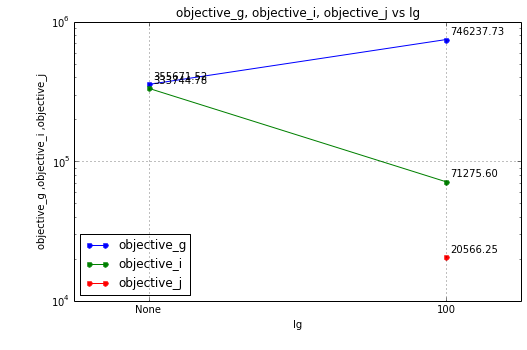

g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)


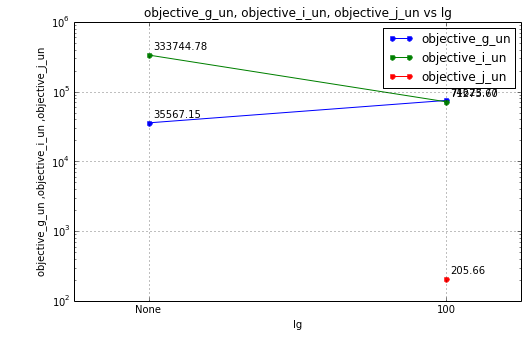

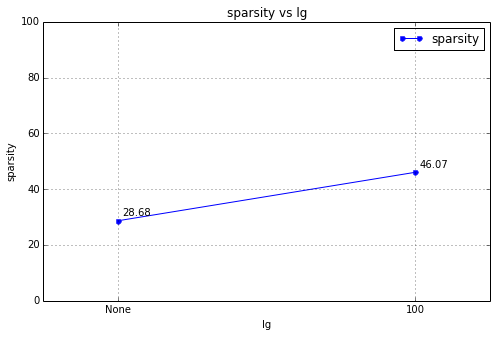

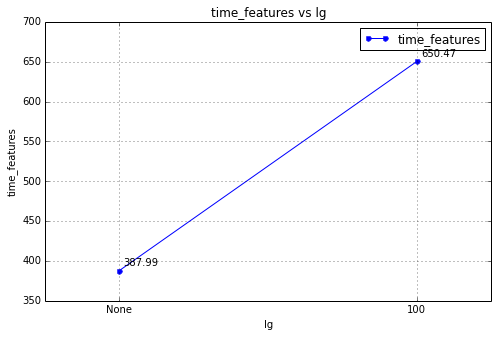

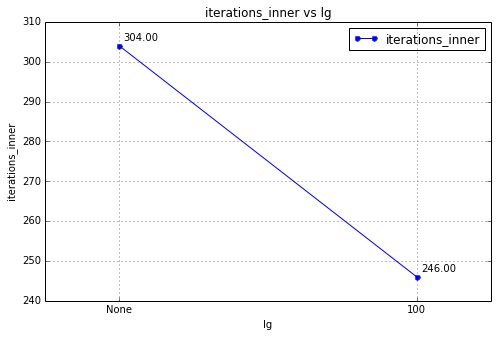

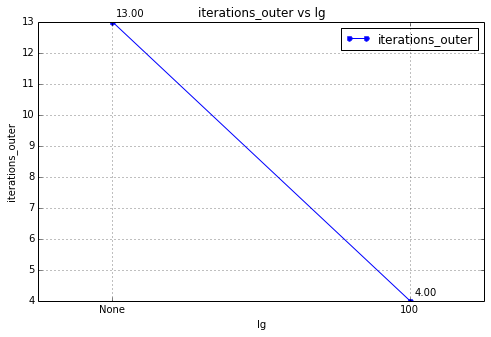

Dictionary atoms for lg = None
Dictionary atoms for lg = 100
Experiment time: 5087 seconds


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [7]:
print('{} = {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms':
        print('res[\'{}\'] = {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    if 'ylim' in kwargs:
        plt.ylim(kwargs['ylim'])
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

def div(l):
    div = Pvalues if Pname is 'l' else [p[l]]
    return np.array([1 if v is None else v for v in div])

# Classification results.
res['chance'] = len(Pvalues) * [100./p['Ngenres']]
res['chance_std'] = 0
err=['accuracy_std', 'baseline_std', 'chance_std']
plot('accuracy', 'baseline', 'chance', err=err, ylim=[0,100])

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_i', 'objective_j', log=True)
    # Unweighted objectives.
    print('g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)')
    res['objective_g_un'] = res['objective_g'] / div('ld')
    res['objective_i_un'] = res['objective_i'] / div('ls')
    res['objective_j_un'] = res['objective_j'] / div('lg')
    plot('objective_g_un', 'objective_i_un', 'objective_j_un', log=True)
    plot('sparsity', ylim=[0,100])
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))